---
---
# Twitter Sentiment Analysis



## Introduction
In this project, the goal is to develop a robust sentiment analysis model for tweets. Each tweet in the dataset is labeled with sentiment categories - Positive, Negative, or Neutral. Sentiment analysis is a crucial aspect in understanding public opinion, customer feedback, and overall social sentiment expressed on various platforms. The project aims to leverage a combination of pre-processing techniques, both shallow and deep classifiers and ensemble methods, as well as data augmentation methods to enhance prediction results.

##Business Understanding:

Understanding the sentiment behind tweets is vital for businesses and organizations to gauge public perception, sentiment trends, and customer satisfaction. The insights derived from sentiment analysis can inform decision-making processes, help improve customer relations, and tailor marketing strategies accordingly. The project aligns with the business need to accurately and efficiently classify tweets into positive, negative, or neutral sentiments.

##Success Criteria:

The success of this project will be measured based on the model's ability to achieve high accuracy and F-1 measure in sentiment classification. Additionally, successful implementation of diverse approaches, including both shallow and deep classifiers, ensemble methods, and possibly advanced machine learning techniques, will contribute to the project's success. The model's generalization to the test set and its performance improvement over baseline models will be critical success factors.

##Research Question:

The primary research question revolves around identifying the most effective combination of approaches for sentiment analysis on tweets. The project aims to explore how different pre-processing techniques, shallow and deep classifiers, ensemble methods, and potentially advanced machine learning approaches can be synergistically employed to enhance sentiment prediction accuracy. The overarching question is how to leverage diverse methodologies to improve sentiment analysis results on a tweet dataset, with a focus on optimizing the F-1 measure as the primary evaluation metric.

#Importing Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.pipeline import Pipeline


#Importing Dataset

In [ ]:
##importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the data into a Pandas DataFrame
train = pd.read_csv('/content/drive/MyDrive/twitter_sentiment_analysis/Tweets_train.csv', delimiter=',',encoding='latin-1')
test = pd.read_csv('/content/drive/MyDrive/twitter_sentiment_analysis/Tweets_test.csv', delimiter=',',encoding='latin-1')
dev = pd.read_csv('/content/drive/MyDrive/twitter_sentiment_analysis/Tweets_dev.csv', delimiter=',',encoding='latin-1')

#Data Cleaning
The dataset has been partitioned into three distinct sets: training, testing, and development (dev). This partitioning is advantageous for assessing the model's hyperparameters during training and validating its performance on the test set. Since there are no null values present, the dataset underwent a thorough examination to identify and eliminate any duplicate rows. Duplicates were identified and removed from each respective set, ensuring the integrity of the data across the training, testing, and development subsets.

In [ ]:
train = train.drop_duplicates()
test = test.drop_duplicates()
dev = dev.drop_duplicates()

# Data Exploration
During the exploratory data analysis (EDA), the shapes of the training, testing, and development sets were found to be (11767, 3), (1455, 3), and (1317, 3), respectively. In the training set, there were 7377 negative tweets, 2491 neutral tweets, and 1899 positive tweets. Subsequent analysis involved creating word clouds for each sentiment category. The word cloud for negative tweets highlighted the prevalence of words such as "flight," "united," "delayed," "cancelled," and "hold." Neutral tweets, on the other hand, featured words like "please," "luggage," and "flight." The positive tweets' word cloud showcased words such as "thank," "love," and "jetblue." This visualization provided insights into the prominent terms associated with each sentiment category in the dataset.

In [ ]:
print(train.shape)
print(test.shape)
print(dev.shape)

(11767, 3)
(1455, 3)
(1317, 3)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11767 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11767 non-null  int64 
 1   text               11767 non-null  object
 2   airline_sentiment  11767 non-null  object
dtypes: int64(1), object(2)
memory usage: 367.7+ KB


In [ ]:
train.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


In [ ]:
temp = train.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
print(temp)

  airline_sentiment  text
0          negative  7377
1           neutral  2491
2          positive  1899


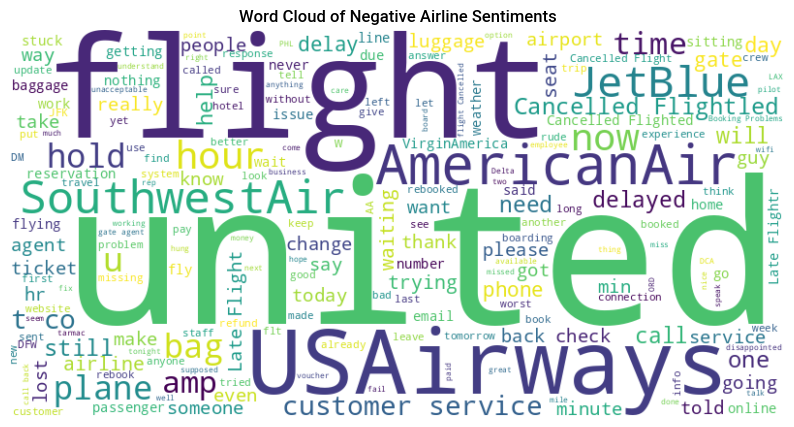

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets with negative sentiment
negative_tweets = train[train['airline_sentiment'] == 'negative']
text_negative = ' '.join(negative_tweets['text'])

# Create WordCloud object for negative sentiment tweets
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(text_negative)

# Plot the WordCloud image for negative sentiment tweets
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers
plt.title('Word Cloud of Negative Airline Sentiments')
plt.show()


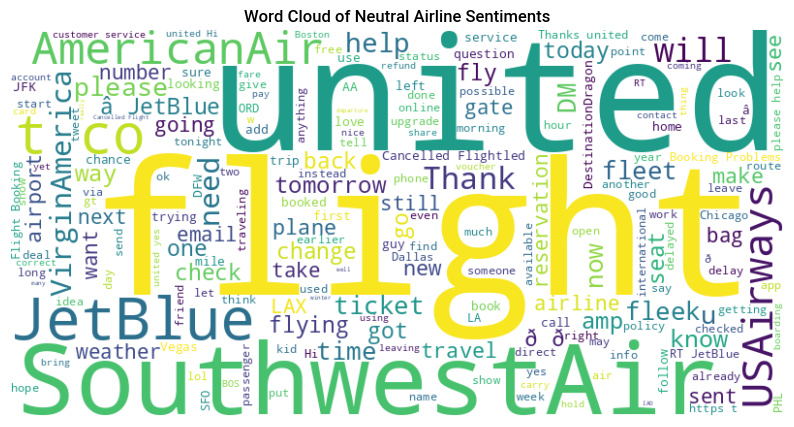

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets with negative sentiment
negative_tweets = train[train['airline_sentiment'] == 'neutral']
text_negative = ' '.join(negative_tweets['text'])

# Create WordCloud object for negative sentiment tweets
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(text_negative)

# Plot the WordCloud image for negative sentiment tweets
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers
plt.title('Word Cloud of Neutral Airline Sentiments')
plt.show()


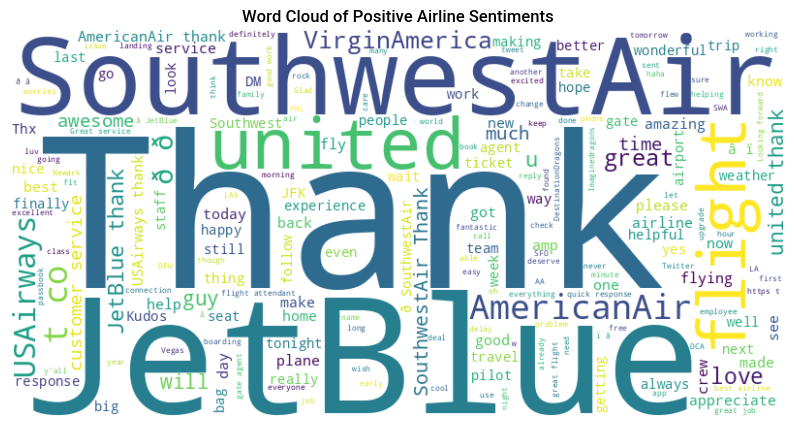

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets with negative sentiment
negative_tweets = train[train['airline_sentiment'] == 'positive']
text_negative = ' '.join(negative_tweets['text'])

# Create WordCloud object for negative sentiment tweets
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(text_negative)

# Plot the WordCloud image for negative sentiment tweets
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers
plt.title('Word Cloud of Positive Airline Sentiments')
plt.show()


#Data Preparation
A data preprocessing function is created that will be used in machine learning pipeline. Initially, it eliminates URLs, hashtags, and usernames using regular expressions. Subsequently, special characters and numbers are removed, and the text is transformed to lowercase for consistency. Tokenization is performed using the NLTK library, creating a list of words in the text. Additionally, the code offers options to apply lemmatization, unigram or n-gram processing, and stopword removal. The lemmatization function utilizes WordNet to obtain the base form of words, contributing to better normalization. The final result is a cleaned and processed representation of the input text, ready for further analysis or utilization in natural language processing tasks.

In the next step sentiment is label encoded with positive as 2, neutral as 1 and negative as 0. The dataset is then dividing into X and y sets.

In [ ]:
categories = ['positive', 'negative', 'neutral']

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopwordEn = set(stopwords.words('english'))
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def lemmaWord(word):
    lemma = wordnet.morphy(word)
    if lemma is not None:
        return lemma
    else:
        return word

def processText(text, lemma=False, gram=1, rmStop=True):
    # Remove URLs, Hashtags, and Usernames
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE)

    # Remove numbers, punctuations, extra spaces, and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()

    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    new_tokens = []
    stoplist = stopwordEn if rmStop else []
    for i in tokens:
        i = i.lower()
        if i.isalpha() and (i not in stoplist or i in whitelist):
            if lemma:
                i = lemmaWord(i)
            new_tokens.append(i)

    if gram <= 1:
        return new_tokens
    else:
        return [' '.join(i) for i in nltk.ngrams(new_tokens, gram)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Map sentiments to numerical labels
train['airline_sentiment'] = train['airline_sentiment'].map(sentiment_mapping)
test['airline_sentiment'] = test['airline_sentiment'].map(sentiment_mapping)
dev['airline_sentiment'] = dev['airline_sentiment'].map(sentiment_mapping)

train.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,2
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",0
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,2
3,569525116725567491,@USAirways The automated message isn't helpful...,0
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,2


In [ ]:
X_train = train['text']  # Excludes 'airline_sentiment' column
y_train = train['airline_sentiment']  # Target variable (sentiment labels)
X_test = test['text']  # Excludes 'airline_sentiment' column
y_test = test['airline_sentiment']  # Target variable (sentiment labels)
X_dev = dev['text']  # Excludes 'airline_sentiment' column
y_dev = dev['airline_sentiment']  # Target variable (sentiment labels)

#Random Forest model with hyperparameter tuning
Random Forest is an ensemble learning method that combines multiple decision trees to enhance predictive accuracy and control overfitting. It's known for its robustness and versatility in handling various types of data. The provided code implements a Random Forest (RF) classifier for sentiment analysis using a text classification pipeline. The text processing involves a CountVectorizer to convert the text data into a bag-of-words representation, followed by TF-IDF transformation for feature weighting. The RF classifier is then applied with hyperparameter tuning using GridSearchCV to optimize performance.

The hyperparameters obtained in the grid search include clf__max_depth=None, clf__min_samples_split=5, clf__n_estimators=200. The best hyperparameters are identified through cross-validation on the training set.

The trained model is evaluated on the development set, and the accuracy of 77% is obtained. Subsequently, the model is used to predict sentiment on the test set, and various performance metrics such as accuracy, precision, recall, and F1-score are displayed using the classification_report. The accuracy on test set is also 77%. The F1 score for negative tweets = 0.87, positive tweets = 64 and neutral as 54. The decrease in F1 score is due to class imbalance.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier


# Level: lexicon, model: tf-idf
text_clf = Pipeline([
    # add your code about text processing
    ('vect', CountVectorizer(analyzer=processText)),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', RandomForestClassifier(random_state=42))
])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10],
    'clf__min_samples_split': [2, 5]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(text_clf, param_grid, cv=3, scoring='accuracy')

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}


In [ ]:
# Now you can use the best estimator (pipeline) for predictions
best_text_clf = grid_search.best_estimator_
best_text_clf.fit(X_train, y_train)

# Evaluate on the dev set
dev_predictions = best_text_clf.predict(X_dev)
accuracy = accuracy_score(y_dev, dev_predictions)
print("Accuracy on Dev Set:", accuracy)

Accuracy on Dev Set: 0.7767653758542141


In [ ]:
predicted = best_text_clf.predict(X_test)
# To evaluate your prediction on test set
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

# confusion class
pd.DataFrame(metrics.confusion_matrix(y_test, predicted))

Accuracy: 0.7752577319587629
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       914
           1       0.67      0.45      0.54       309
           2       0.71      0.59      0.64       232

    accuracy                           0.78      1455
   macro avg       0.73      0.66      0.68      1455
weighted avg       0.76      0.78      0.76      1455



,0,1,2
0,853,45,16
1,131,139,39
2,73,23,136


#XGBoost with hyperparameter tuning
XGBoost is a powerful ensemble learning algorithm that combines the strengths of decision trees to achieve high predictive accuracy while mitigating overfitting. The provided code applies XGBoost within a text classification pipeline for sentiment analysis. The preprocessing involves using a CountVectorizer to transform the text data into a bag-of-words representation, followed by TF-IDF transformation for effective feature weighting.

Through a grid search using GridSearchCV, the optimal hyperparameters for the XGBoost classifier are identified as clf__learning_rate=0.1, clf__max_depth=15, and clf__n_estimators=200. These hyperparameters are determined through cross-validation on the training set, showcasing the effectiveness of the tuning process.

The trained XGBoost model is evaluated on the development set, achieving an accuracy of 78.4%. Subsequently, the model is applied to predict sentiment on the test set, and a comprehensive evaluation is provided using the classification_report. The overall accuracy on the test set is 77%. The F1 scores for negative, positive, and neutral tweets are 0.86, 0.59, and 0.65, respectively. It's notable that the slight decrease in F1 scores, particularly for positive and neutral tweets, may be attributed to class imbalance within the dataset.

In [ ]:
import xgboost as xgb
xg_model = Pipeline([
    # add your code about text processing
    ('vect', CountVectorizer(analyzer=processText)),
    ('tfidf', TfidfTransformer(use_idf=True)),

    # change your classifier here, search: sklearn logistic regression example
    ('clf', xgb.XGBClassifier(objective='binary:logistic'))
])

In [ ]:

param_grid = {
    'clf__learning_rate': [0.1, 0.01],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10,15]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xg_model, param_grid, cv=3, scoring='accuracy')

# Perform Grid Search Cross-Validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 15, 'clf__n_estimators': 200}


In [ ]:
# Now you can use the best estimator (pipeline) for predictions
best_text_xg = grid_search.best_estimator_
best_text_xg.fit(X_train, y_train)

# Evaluate on the dev set
dev_predictions = best_text_xg.predict(X_dev)
accuracy = accuracy_score(y_dev, dev_predictions)
print("Accuracy on Dev Set:", accuracy)

Accuracy on Dev Set: 0.7843583902809416


In [ ]:
predicted = best_text_xg.predict(X_test)
# To evaluate your prediction on test set
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

# confusion class
pd.DataFrame(metrics.confusion_matrix(y_test, predicted))

Accuracy: 0.7745704467353952
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       914
           1       0.61      0.56      0.59       309
           2       0.70      0.61      0.65       232

    accuracy                           0.77      1455
   macro avg       0.72      0.69      0.70      1455
weighted avg       0.77      0.77      0.77      1455



,0,1,2
0,811,78,25
1,100,174,35
2,58,32,142


#Neural Network Model Preprocessing
The code performs essential text preprocessing for a neural network model using TensorFlow and Keras. The text cleaning function (`preprocess_text`) systematically removes user handles, URLs, hashtags, numeric numbers, and punctuation from the input text while ensuring uniformity by converting all text to lowercase. This cleaning process is then applied to the 'text' column of the training, testing, and development datasets. Subsequently, the `TextVectorization` layer from TensorFlow is employed to convert the preprocessed text into numerical tokens, setting a maximum of 2000 tokens and an output sequence length of 200. The vocabulary is adapted using the training data. Furthermore, the code initializes word embeddings using pre-trained GloVe embeddings with 50 dimensions. The GloVe embeddings are loaded from the `glove.6B.50d.txt` file, and a matrix is constructed to map words in the vocabulary to their corresponding embeddings. The resulting embedding layer is set as non-trainable to preserve the pre-trained embeddings during model training. Overall, this preprocessing routine enhances the model's capability to comprehend semantic relationships within the textual data.

In [ ]:
import re
import nltk


# Function to preprocess text in DataFrame
def preprocess_text(text):
    # Remove user handles
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove numeric numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply preprocessing to the 'text' column
train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)
dev['text'] = dev['text'].apply(preprocess_text)

# Display the preprocessed text
print(train['text'])


0                                     youre good thank you
1        way to ruin a vacation my brother has called a...
2        yes thankfully catering just got here and now ...
3        the automated message isnt helpful and its imp...
4                                              im on my to
                               ...                        
11853    will not help us on the phone at the gate or i...
11854    has the worst customer service line ive called...
11855    grades for this trip flight timeliness ðâï can...
11856    thanks for the vague canned response that does...
11857    already did that at the airport and hrs late f...
Name: text, Length: 11767, dtype: object


In [ ]:
from tensorflow.keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens=2000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(X_train).batch(128)
vectorizer.adapt(text_ds)
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-01-11 15:23:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-01-11 15:23:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-01-11 15:23:31--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
path_to_glove_file="/content/glove.6B.50d.txt"
print (path_to_glove_file)
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

/content/glove.6B.50d.txt
Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 50
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Converted 1920 words (80 misses)


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras import Sequential

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

# Shallow Neural Network
The code defines a shallow neural network model for text classification using TensorFlow and Keras. The model begins with an input layer, followed by an embedding layer to convert integer sequences into dense vectors. A one-dimensional convolutional layer with 128 filters and ReLU activation is applied, followed by a dense layer with 64 units and ReLU activation. To prevent overfitting, a dropout layer with a dropout rate of 0.5 is incorporated. Finally, a global average pooling layer is employed to collapse the temporal dimension, and the output layer with a softmax activation function yields predictions for three classes. The model is compiled using sparse categorical crossentropy loss, the Adam optimizer, and accuracy as the metric. Training is conducted with a batch size of 128 over 20 epochs, using validation data for performance evaluation.
The model is trained on training data and evaluated on test set.
The test accuracy of the model is 79.59% and the F1 score for positive, neutral and negative tweets is 0.69, 0.64 and 0.87 respectively.

In [ ]:
from tensorflow.keras import layers, models

# Input layer
int_sequences_input = layers.Input(shape=(None,), dtype="int64")

# Assuming you have an embedding layer defined
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
# Shallow architecture - one or two Dense layers
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# Global Average Pooling to collapse the temporal dimension
x = layers.GlobalAveragePooling1D()(x)

# Output layer with the desired shape (None, 3)
preds = layers.Dense(3, activation="softmax")(x)


# Create the model
shallow_model = models.Model(int_sequences_input, preds)
shallow_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 50)          100100    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         32128     
                                                                 
 dense (Dense)               (None, None, 64)          8256      
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                             

In [ ]:
x_train = vectorizer(np.array([[s] for s in X_train])).numpy()
x_val = vectorizer(np.array([[s] for s in X_dev])).numpy()
y_train = np.array(y_train)
y_val = np.array(y_dev)
x_test = vectorizer(np.array([[s] for s in X_test])).numpy()
y_test = np.array(y_test)

In [ ]:
shallow_model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]
)
shallow_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
92/92 [==============================] - 23s 242ms/step - loss: 0.5009 - acc: 0.8034 - val_loss: 0.5666 - val_acc: 0.7677
Epoch 2/20
92/92 [==============================] - 23s 253ms/step - loss: 0.4908 - acc: 0.8090 - val_loss: 0.5682 - val_acc: 0.7752
Epoch 3/20
92/92 [==============================] - 17s 182ms/step - loss: 0.4848 - acc: 0.8085 - val_loss: 0.5618 - val_acc: 0.7730
Epoch 4/20
92/92 [==============================] - 17s 189ms/step - loss: 0.4819 - acc: 0.8087 - val_loss: 0.5589 - val_acc: 0.7790
Epoch 5/20
92/92 [==============================] - 28s 310ms/step - loss: 0.4747 - acc: 0.8118 - val_loss: 0.5635 - val_acc: 0.7715
Epoch 6/20
92/92 [==============================] - 18s 199ms/step - loss: 0.4675 - acc: 0.8116 - val_loss: 0.5696 - val_acc: 0.7677
Epoch 7/20
92/92 [==============================] - 15s 165ms/step - loss: 0.4671 - acc: 0.8172 - val_loss: 0.5755 - val_acc: 0.7677
Epoch 8/20
92/92 [==============================] - 15s 165ms/step - 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = shallow_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert predicted probabilities to class labels

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report with precision, recall, F1-score, etc.
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

46/46 [==============================] - 1s 19ms/step
Accuracy: 0.7959
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       914
           1       0.64      0.64      0.64       309
           2       0.72      0.66      0.69       232

    accuracy                           0.80      1455
   macro avg       0.74      0.73      0.73      1455
weighted avg       0.79      0.80      0.79      1455



# Deep Learning Model
The code defines a deep neural network model for text classification, designed for sentiment analysis, using the Keras framework. The model consists of an input layer for integer sequences, an embedding layer initialized with pre-trained word embeddings, and a series of one-dimensional convolutional layers (Conv1D) with rectified linear unit (ReLU) activation functions. The convolutional layers are followed by max-pooling operations, contributing to the hierarchical feature extraction from the input sequences. The final layers include a global max-pooling operation, a densely connected layer with ReLU activation, a dropout layer for regularization, and an output layer with softmax activation, suitable for multi-class classification. The model is compiled using the sparse categorical cross-entropy loss function and the Adam optimizer. During training, the model is fitted on the training dataset, utilizing a batch size of 128, over 20 epochs, with validation performed on a separate validation set. The summary of the model architecture reveals the layer-wise structure and parameter details, providing insights into the neural network's complexity and potential capacity for capturing intricate patterns in textual data.
The accuracy of validation set is 74.14% and that of test set is 74.64%.  The F1 score for positive, neutral and negative tweets is 0.60, 0.55 and 0.85 respectively.

In [ ]:
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
print(x.shape)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(categories), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

(None, None, 128)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 50)          100100    
                                                                 
 conv1d_4 (Conv1D)           (None, None, 128)         32128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 128)        0         
 1D)                                     

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
92/92 [==============================] - 18s 186ms/step - loss: 0.8158 - acc: 0.6497 - val_loss: 0.7020 - val_acc: 0.7183
Epoch 2/20
92/92 [==============================] - 18s 196ms/step - loss: 0.6365 - acc: 0.7468 - val_loss: 0.6140 - val_acc: 0.7517
Epoch 3/20
92/92 [==============================] - 17s 183ms/step - loss: 0.5397 - acc: 0.7850 - val_loss: 0.6010 - val_acc: 0.7494
Epoch 4/20
92/92 [==============================] - 17s 190ms/step - loss: 0.4583 - acc: 0.8222 - val_loss: 0.6060 - val_acc: 0.7517
Epoch 5/20
92/92 [==============================] - 17s 187ms/step - loss: 0.3711 - acc: 0.8590 - val_loss: 0.6342 - val_acc: 0.7426
Epoch 6/20
92/92 [==============================] - 17s 185ms/step - loss: 0.3151 - acc: 0.8845 - val_loss: 0.7036 - val_acc: 0.7304
Epoch 7/20
92/92 [==============================] - 21s 226ms/step - loss: 0.2397 - acc: 0.9171 - val_loss: 0.8179 - val_acc: 0.7312
Epoch 8/20
92/92 [==============================] - 18s 192ms/step - 

In [ ]:
model.evaluate(x_val, y_val)

42/42 [==============================] - 1s 15ms/step - loss: 1.8472 - acc: 0.7411


[1.8471759557724, 0.7410781979560852]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert predicted probabilities to class labels

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report with precision, recall, F1-score, etc.
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)


46/46 [==============================] - 1s 15ms/step
Accuracy: 0.7464
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       914
           1       0.54      0.55      0.55       309
           2       0.67      0.54      0.60       232

    accuracy                           0.75      1455
   macro avg       0.68      0.65      0.66      1455
weighted avg       0.74      0.75      0.74      1455



#Conclusion
In conclusion, the Twitter sentiment analysis project explored various machine learning models, including ensemble methods like Random Forest (RF) and XGBoost, as well as neural network models encompassing both shallow and deep architectures. Among these, the shallow neural network emerged as the most effective, achieving the highest accuracy and F1 scores. The model demonstrated a remarkable test accuracy of 79.59%, showcasing its proficiency in discerning sentiment from tweets. The F1 scores further underscore its effectiveness, with positive, neutral, and negative tweets exhibiting scores of 0.69, 0.64, and an impressive 0.87, respectively. The comprehensive evaluation of these models provides valuable insights into their performance, ultimately contributing to the understanding of sentiment analysis in the context of Twitter data.